# Classification Project

## File IO

Only File IO...

You may not change this code.

In [1]:
# Base Module of data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

tk_window = tkinter.Tk()
cwd = os.getcwd()

tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))

tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))

tr_ans = tr_ans.iloc[:, 0]

ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

tk_window.destroy()



## Predict Algorithm

Type your source code (Champion Algorithm)

In [3]:
# keep these

s1 = pd.Series(tr_ans, name = 'color')
data = pd.concat([tr_data, s1], axis=1)

original_data = data.copy()

In [4]:
def remove_outliers():
    data.drop(['quality'], axis=1, inplace=True)

    df = data.copy(deep=True)

    types = df['color'].unique()
    d = {type: df[df['color'] == type] for type in types}

    low = .25
    high = .75

    bounds = {}
    for type in types:
        filt_df = d[type].loc[:, d[type].columns != 'color']
        quant_df = filt_df.quantile([low, high])
        IQR = quant_df.iloc[1,:]- quant_df.iloc[0,:]
        quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5*IQR
        quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5*IQR
        bounds[type] = quant_df

    filt_df = d[1].loc[:, d[1].columns != 'color'] # Remove 'Type' Column
    filt_df = filt_df.apply(lambda x: x[(x>bounds[1].loc[low,x.name]) & (x < bounds[1].loc[high,x.name])], axis=0)
    filt_df = pd.concat([filt_df,d[1].loc[:,'color']], axis=1)

In [5]:
if data.shape[0] < 3250:
    remove_outliers()

In [6]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF = RF.fit(tr_data, tr_ans)
y_pred = RF.predict(ts_data)

# End of Demo

C:\Users\Susan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Check Accuracy

Only for check accuracy

In [7]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

tk_window = tkinter.Tk()
cwd = os.getcwd()
ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
ts_ans = ts_ans.iloc[:, 0]
tk_window.destroy()

print(accuracy(ts_ans, y_pred))

0.9930715935334873


F-Score: 0.993
Accuracy:  0.9930715935334873
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       331
          1       1.00      0.99      1.00       968

avg / total       0.99      0.99      0.99      1299



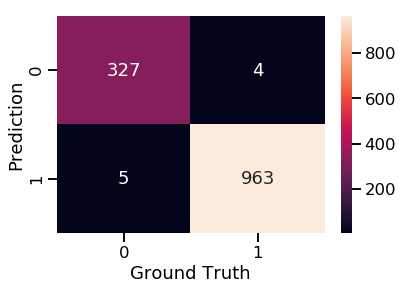

In [8]:
p,r,f,s = precision_recall_fscore_support(ts_ans, y_pred, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(ts_ans, y_pred))

print(classification_report(ts_ans, y_pred))

labels = sorted(ts_ans.unique())
chart = pd.DataFrame(confusion_matrix(ts_ans, y_pred),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');